In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import math
from functools import reduce

from sklearn.preprocessing import scale
# import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


%matplotlib inline

import numpy as np
import pandas as pd

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import os
import pandas_datareader.data as web

## Importing SP 500 Index

 - https://finance.yahoo.com/quote/%5EGSPC/

In [2]:
data = web.get_data_yahoo('^GSPC','01/02/1970',interval='m')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1970-01-01,94.250000,84.419998,92.059998,85.019997,221090000,85.019997
1970-02-01,90.330002,84.639999,85.019997,89.500000,228380000,89.500000
1970-03-01,91.070000,86.190002,89.500000,89.629997,212880000,89.629997
1970-04-01,90.699997,79.309998,89.629997,81.519997,223120000,81.519997
1970-05-01,82.320000,68.610001,81.519997,76.550003,258220000,76.550003


In [3]:
data = data[['Close','Open']]

In [4]:
data.loc[(data['Close'] - data['Open']) > 0, 'Buy_Sell'] = '1'
data.loc[(data['Close'] - data['Open']) < 0, 'Buy_Sell'] = '0'

In [5]:
data = data.reset_index()
data.head()

,Date,Close,Open,Buy_Sell
0,1970-01-01,85.019997,92.059998,0
1,1970-02-01,89.500000,85.019997,1
2,1970-03-01,89.629997,89.500000,1
3,1970-04-01,81.519997,89.629997,0
4,1970-05-01,76.550003,81.519997,0


In [6]:
data.isnull().sum()

Date        0
Close       0
Open        0
Buy_Sell    1
dtype: int64

In [7]:
data.shape

(609, 4)

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Date        0
Close       0
Open        0
Buy_Sell    0
dtype: int64

In [10]:
data.shape

(608, 4)

In [11]:
data['Buy_Sell'].value_counts()

1    363
0    245
Name: Buy_Sell, dtype: int64

## Importing US Indicators by months

In [12]:
Unemployment_Rate = web.DataReader('UNRATE', 'fred', start = 1970)
Unemployment_Rate.rename(columns = {'UNRATE':'Unemployment_Rate'},inplace=True)
Unemployment_Rate.shape

(607, 1)

In [13]:
Unemployment_Persons = web.DataReader('UNEMPLOY', 'fred', start = 1970)
Unemployment_Persons.rename(columns = {'UNEMPLOY':'Unemployment_Persons'},inplace=True)
Unemployment_Persons.shape

(607, 1)

In [14]:
Employment_Persons = web.DataReader('CE16OV', 'fred', start = 1970)
Employment_Persons.rename(columns = {'CE16OV':'Employment_Persons'},inplace=True)
Employment_Persons.shape

(607, 1)

In [15]:
Year_Treasury_10 = web.DataReader('GS10', 'fred', start = 1970)
Year_Treasury_10.rename(columns = {'GS10':'Year_Treasury_10'},inplace=True)
Year_Treasury_10.shape

(607, 1)

In [16]:
Funds_rate = web.DataReader('FEDFUNDS', 'fred', start = 1970)
Funds_rate.rename(columns = {'FEDFUNDS':'Funds_rate'},inplace=True)
Funds_rate.shape

(607, 1)

In [17]:
Interest_Rates = web.DataReader('INTDSRUSM193N', 'fred', start = 1970)
Interest_Rates.rename(columns = {'INTDSRUSM193N':'Interest_Rates'},inplace=True)
Interest_Rates.shape

(606, 1)

In [18]:
CPI = web.DataReader('CPIAUCSL', 'fred', start = 1970)
CPI.rename(columns = {'CPIAUCSL':'CPI'},inplace=True)
CPI.shape

(607, 1)

In [19]:
M2 = web.DataReader('M2SL', 'fred', start = 1970)
M2.rename(columns = {'M2SL':'M2'},inplace=True)
M2.shape

(607, 1)

In [20]:
M1 = web.DataReader('M1SL', 'fred', start = 1970)
M1.rename(columns = {'M1SL':'M1'},inplace=True)
M1.shape

(607, 1)

In [21]:
M3 = web.DataReader('MABMM301USM189S', 'fred', start = 1970)
M3.rename(columns = {'MABMM301USM189S':'M3'},inplace=True)
M3.shape

(606, 1)

In [22]:
All_Employees = web.DataReader('PAYEMS', 'fred', start = 1970)
All_Employees.rename(columns = {'PAYEMS':'All_Employees'},inplace=True)
All_Employees.shape

(607, 1)

In [23]:
Industrial_Production_Index = web.DataReader('INDPRO', 'fred', start = 1970)
Industrial_Production_Index.rename(columns = {'INDPRO':'Industrial_Production_Index'},inplace=True)
Industrial_Production_Index.shape

(607, 1)

In [24]:
Treasure_bill_3M = web.DataReader('TB3MS', 'fred', start = 1970)
Treasure_bill_3M.rename(columns = {'TB3MS':'Treasure_bill_3M'},inplace=True)
Treasure_bill_3M.shape

(607, 1)

In [25]:
Personal_savings_rate = web.DataReader('PSAVERT', 'fred', start = 1970)
Personal_savings_rate.rename(columns = {'PSAVERT':'Personal_savings_rate'},inplace=True)
Personal_savings_rate.shape

(606, 1)

In [26]:
Personal_Consumption_Expenditures = web.DataReader('PCE', 'fred', start = 1970)
Personal_Consumption_Expenditures.rename(columns = {'PCE':'Personal_Consumption_Expenditures'},inplace=True)
Personal_Consumption_Expenditures.shape

(606, 1)

In [27]:
Housing_Starts = web.DataReader('HOUST', 'fred', start = 1970)
Housing_Starts.rename(columns = {'HOUST':'Housing_Starts'},inplace=True)
Housing_Starts.shape

(606, 1)

In [28]:
Labor_Force_Participation_Rate = web.DataReader('CIVPART', 'fred', start = 1970)
Labor_Force_Participation_Rate.rename(columns = {'CIVPART':'Labor_Force_Participation_Rate'},inplace=True)
Labor_Force_Participation_Rate.shape

(607, 1)

In [29]:
# Consumer_sentiment = web.DataReader('UMCSENT', 'fred', start = 1970)
# Consumer_sentiment.rename(columns = {'UMCSENT':'Consumer_sentiment'},inplace=True)
# Consumer_sentiment.shape

In [30]:
Commercial_and_Industrial_Loans = web.DataReader('BUSLOANS', 'fred', start = 1970)
Commercial_and_Industrial_Loans.rename(columns = {'BUSLOANS':'Commercial_and_Industrial_Loans'},inplace=True)
Commercial_and_Industrial_Loans.shape

(607, 1)

In [31]:
Real_Disposable_Personal_Income = web.DataReader('DSPIC96', 'fred', start = 1970)
Real_Disposable_Personal_Income.rename(columns = {'DSPIC96':'Real_Disposable_Personal_Income'},inplace=True)
Real_Disposable_Personal_Income.shape

(606, 1)

In [32]:
Bank_Prime_Loan_Rate = web.DataReader('MPRIME', 'fred', start = 1970)
Bank_Prime_Loan_Rate.rename(columns = {'MPRIME':'Bank_Prime_Loan_Rate'},inplace=True)
Bank_Prime_Loan_Rate.shape

(607, 1)

In [33]:
New_Private_Housing_Building_Permits = web.DataReader('PERMIT', 'fred', start = 1970)
New_Private_Housing_Building_Permits.rename(columns = {'PERMIT':'New_Private_Housing_Building_Permits'},inplace=True)
New_Private_Housing_Building_Permits.shape

(606, 1)

In [34]:
Motor_Vehicle_Retail_Sales = web.DataReader('HTRUCKSSAAR', 'fred', start = 1970)
Motor_Vehicle_Retail_Sales.rename(columns = {'HTRUCKSSAAR':'Motor_Vehicle_Retail_Sales'},inplace=True)
Motor_Vehicle_Retail_Sales.shape

(607, 1)

In [35]:
Currency_in_Circulation = web.DataReader('CURRCIR', 'fred', start = 1970)
Currency_in_Circulation.rename(columns = {'CURRCIR':'Currency_in_Circulation'},inplace=True)
Currency_in_Circulation.shape

(607, 1)

In [36]:
WTI = web.DataReader('WTISPLC', 'fred', start = 1970)
WTI.rename(columns = {'WTISPLC':'WTI'},inplace=True)
WTI.shape

(607, 1)

In [37]:
Population = web.DataReader('POPTHM', 'fred', start = 1970)
Population.rename(columns = {'POPTHM':'Population'},inplace=True)
Population.shape

(606, 1)

In [38]:
Bank_Credit = web.DataReader('LOANINV', 'fred', start = 1970)
Bank_Credit.rename(columns = {'LOANINV':'Bank_Credit'},inplace=True)
Bank_Credit.shape

(607, 1)

In [39]:
Leading_Indicators_OECD = web.DataReader('USALORSGPNOSTSAM', 'fred', start = 1970)
Leading_Indicators_OECD.rename(columns = {'USALORSGPNOSTSAM':'Leading_Indicators_OECD'},inplace=True)
Leading_Indicators_OECD.shape

(605, 1)

In [40]:
Personal_Saving = web.DataReader('PMSAVE', 'fred', start = 1970)
Personal_Saving.rename(columns = {'PMSAVE':'Personal_Saving'},inplace=True)
Personal_Saving.shape

(606, 1)

In [41]:
Demand_Deposits = web.DataReader('DEMDEPSL', 'fred', start = 1970)
Demand_Deposits.rename(columns = {'DEMDEPSL':'Demand_Deposits'},inplace=True)
Demand_Deposits.shape

(607, 1)

## Merging into one dataset

In [42]:
df = data.merge(Unemployment_Rate, how='left', 
                            left_on='Date', right_on='DATE').merge(Unemployment_Persons, how='left', 
                            left_on='Date', right_on='DATE').merge(Employment_Persons, how='left',
                            left_on='Date', right_on='DATE').merge(Year_Treasury_10, how='left',
                            left_on='Date', right_on='DATE').merge(Funds_rate, how='left',
                            left_on='Date', right_on='DATE').merge(Interest_Rates, how='left',
                            left_on='Date', right_on='DATE').merge(CPI, how='left', 
                            left_on='Date', right_on='DATE').merge(M2, how='left',
                            left_on='Date', right_on='DATE').merge(M1, how='left',
                            left_on='Date', right_on='DATE').merge(M3, how='left',
                            left_on='Date', right_on='DATE').merge(All_Employees, how='left',                                                                   
                            left_on='Date', right_on='DATE').merge(Industrial_Production_Index, how='left', 
                            left_on='Date', right_on='DATE').merge(Treasure_bill_3M, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_savings_rate, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_Consumption_Expenditures, how='left',
                            left_on='Date', right_on='DATE').merge(Housing_Starts, how='left',
                            left_on='Date', right_on='DATE').merge(Labor_Force_Participation_Rate, how='left', 
                            left_on='Date', right_on='DATE').merge(Commercial_and_Industrial_Loans, how='left',
                            left_on='Date', right_on='DATE').merge(Real_Disposable_Personal_Income, how='left',
                            left_on='Date', right_on='DATE').merge(Bank_Prime_Loan_Rate, how='left',                                                                     
                            left_on='Date', right_on='DATE').merge(New_Private_Housing_Building_Permits, how='left', 
                            left_on='Date', right_on='DATE').merge(Motor_Vehicle_Retail_Sales, how='left',
                            left_on='Date', right_on='DATE').merge(Currency_in_Circulation, how='left',
                            left_on='Date', right_on='DATE').merge(WTI, how='left',
                            left_on='Date', right_on='DATE').merge(Population, how='left',
                            left_on='Date', right_on='DATE').merge(Bank_Credit, how='left',
                            left_on='Date', right_on='DATE').merge(Leading_Indicators_OECD, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_Saving, how='left',
                            left_on='Date', right_on='DATE').merge(Demand_Deposits, how='left',
                            left_on='Date', right_on='DATE')    

In [43]:
df.head()

,Date,Close,Open,Buy_Sell,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,1970-01-01,85.019997,92.059998,0,3.9,3201.0,78780.0,7.79,8.98,6.0,...,8.50,1062.0,0.332,52.737,3.35,203929.0,398.5684,99.381221,86.3,159.3
1,1970-02-01,89.500000,85.019997,1,4.2,3453.0,78698.0,7.24,8.98,6.0,...,8.50,1118.0,0.379,52.112,3.35,204082.0,396.2011,99.156183,86.1,158.0
2,1970-03-01,89.629997,89.500000,1,4.4,3635.0,78863.0,7.07,7.76,6.0,...,8.39,1132.0,0.351,52.411,3.35,204246.0,398.7779,98.963485,92.4,158.5
3,1970-04-01,81.519997,89.629997,0,4.6,3797.0,78930.0,7.39,8.10,6.0,...,8.00,1224.0,0.347,52.867,3.35,204504.0,402.5058,98.801924,100.3,159.3
4,1970-05-01,76.550003,81.519997,0,4.8,3919.0,78564.0,7.91,7.94,6.0,...,8.00,1328.0,0.336,53.490,3.35,204719.0,402.4179,98.666184,93.2,159.4


In [44]:
# df.to_excel("output10.xlsx")

## Data cleaning

In [45]:
df.isnull().sum()

Date                                    0
Close                                   0
Open                                    0
Buy_Sell                                0
Unemployment_Rate                       2
Unemployment_Persons                    2
Employment_Persons                      2
Year_Treasury_10                        2
Funds_rate                              2
Interest_Rates                          3
CPI                                     2
M2                                      2
M1                                      2
M3                                      3
All_Employees                           2
Industrial_Production_Index             2
Treasure_bill_3M                        2
Personal_savings_rate                   3
Personal_Consumption_Expenditures       3
Housing_Starts                          3
Labor_Force_Participation_Rate          2
Commercial_and_Industrial_Loans         2
Real_Disposable_Personal_Income         3
Bank_Prime_Loan_Rate              

In [46]:
df.shape

(608, 33)

In [47]:
df = df.iloc[0:605]

In [48]:
df.isnull().sum()

Date                                    0
Close                                   0
Open                                    0
Buy_Sell                                0
Unemployment_Rate                       0
Unemployment_Persons                    0
Employment_Persons                      0
Year_Treasury_10                        0
Funds_rate                              0
Interest_Rates                          0
CPI                                     0
M2                                      0
M1                                      0
M3                                      0
All_Employees                           0
Industrial_Production_Index             0
Treasure_bill_3M                        0
Personal_savings_rate                   0
Personal_Consumption_Expenditures       0
Housing_Starts                          0
Labor_Force_Participation_Rate          0
Commercial_and_Industrial_Loans         0
Real_Disposable_Personal_Income         0
Bank_Prime_Loan_Rate              

In [49]:
# df.to_excel("output10.xlsx")

## Correlation analysis

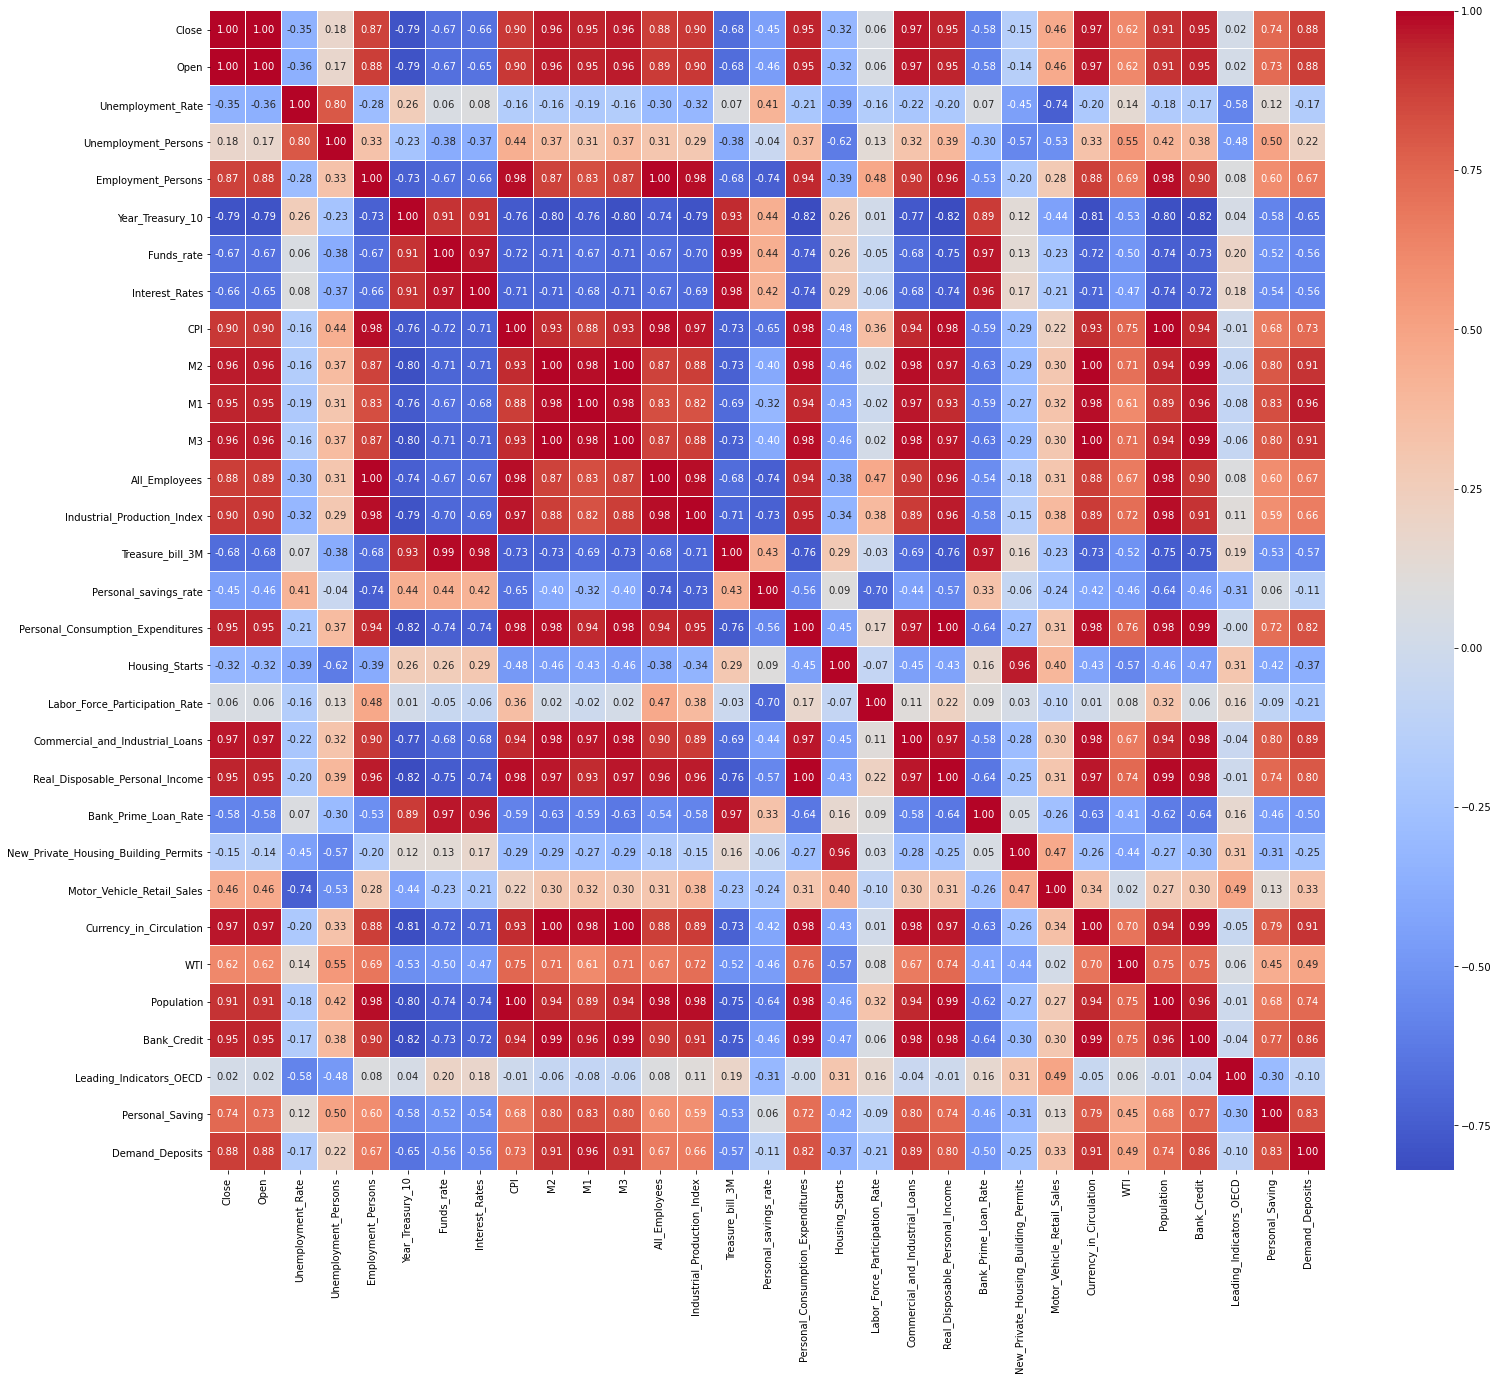

In [50]:
f, ax = plt.subplots(figsize=(25, 20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

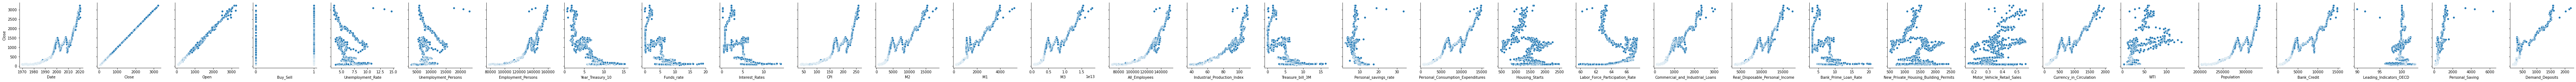

In [51]:
sns.pairplot(data=df, x_vars=df.columns, y_vars = 'Close', height=3)

## Data standartization

In [52]:
df.head()

,Date,Close,Open,Buy_Sell,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,1970-01-01,85.019997,92.059998,0,3.9,3201.0,78780.0,7.79,8.98,6.0,...,8.50,1062.0,0.332,52.737,3.35,203929.0,398.5684,99.381221,86.3,159.3
1,1970-02-01,89.500000,85.019997,1,4.2,3453.0,78698.0,7.24,8.98,6.0,...,8.50,1118.0,0.379,52.112,3.35,204082.0,396.2011,99.156183,86.1,158.0
2,1970-03-01,89.629997,89.500000,1,4.4,3635.0,78863.0,7.07,7.76,6.0,...,8.39,1132.0,0.351,52.411,3.35,204246.0,398.7779,98.963485,92.4,158.5
3,1970-04-01,81.519997,89.629997,0,4.6,3797.0,78930.0,7.39,8.10,6.0,...,8.00,1224.0,0.347,52.867,3.35,204504.0,402.5058,98.801924,100.3,159.3
4,1970-05-01,76.550003,81.519997,0,4.8,3919.0,78564.0,7.91,7.94,6.0,...,8.00,1328.0,0.336,53.490,3.35,204719.0,402.4179,98.666184,93.2,159.4


In [53]:
columns=df.drop(columns = ['Date','Open','Close','Buy_Sell']).columns

In [54]:
df1 = df.drop(columns = ['Date','Open','Close','Buy_Sell'])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [56]:
df1 = scaler.transform(df1)

In [57]:
pd.DataFrame(df1, columns=columns).describe()

,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,M3,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
count,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,6.050000e+02,6.050000e+02,...,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,6.040000e+02,6.050000e+02,6.050000e+02
mean,1.409341e-16,4.697803e-17,1.879121e-16,0.000000,1.409341e-16,-9.395606e-17,1.879121e-16,0.000000,-1.879121e-16,4.697803e-17,...,9.395606e-17,2.936127e-17,-3.758243e-16,-1.409341e-16,9.395606e-17,-6.576924e-16,0.000000,-1.667540e-15,-1.409341e-16,-9.395606e-17
std,1.000827e+00,1.000827e+00,1.000827e+00,1.000827,1.000827e+00,1.000827e+00,1.000827e+00,1.000827,1.000827e+00,1.000827e+00,...,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827,1.000829e+00,1.000827e+00,1.000827e+00
min,-1.632443e+00,-1.906292e+00,-1.886195e+00,-1.821144,-1.290103e+00,-1.480684e+00,-1.665414e+00,-1.112340,-1.039909e+00,-1.112340e+00,...,-1.222917e+00,-2.158011e+00,-2.077542e+00,-1.037233e+00,-1.181074e+00,-1.630890e+00,-1.106393,-7.565161e+00,-8.874704e-01,-7.857284e-01
25%,-7.338913e-01,-6.017201e-01,-9.362481e-01,-0.775276,-8.584896e-01,-8.336650e-01,-7.669636e-01,-0.802620,-7.904950e-01,-8.026197e-01,...,-7.893652e-01,-7.010976e-01,-6.934878e-01,-8.372969e-01,-6.969817e-01,-8.874818e-01,-0.861015,-4.315813e-01,-4.943127e-01,-5.577747e-01
50%,-2.546639e-01,-1.872613e-01,1.378838e-01,-0.018484,3.027560e-02,5.598584e-02,4.584853e-02,-0.403132,-1.722575e-01,-4.031319e-01,...,5.479712e-03,1.380086e-02,-9.727976e-02,-3.149174e-01,-3.126437e-01,-3.067285e-02,-0.378124,1.694001e-02,-2.515396e-01,-3.879518e-01
75%,6.438877e-01,2.510398e-01,8.287305e-01,0.569410,5.589377e-01,4.991937e-01,9.327903e-01,0.553371,1.243856e-01,5.533699e-01,...,4.390315e-01,7.040477e-01,6.905666e-01,5.241342e-01,5.005401e-01,9.239863e-01,0.951333,5.905270e-01,7.912643e-02,-1.688827e-01
max,5.076742e+00,5.992268e+00,1.620382e+00,2.940476,3.575121e+00,2.967570e+00,1.657200e+00,3.167988,3.915595e+00,3.167961e+00,...,3.762928e+00,2.540597e+00,2.223673e+00,2.861221e+00,3.541618e+00,1.626710e+00,2.555088,2.263110e+00,1.319652e+01,4.427761e+00


In [58]:
df1 = pd.DataFrame(df1, columns=columns)
df1.head()

,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,M3,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,-1.392829,-1.906292,-1.870187,0.494705,0.990551,0.379495,-1.665414,-1.111537,-1.038721,-1.111536,...,0.294514,-0.804635,-0.235685,-1.035952,-1.179628,-1.630890,-1.105793,-0.427010,-0.887021,-0.782428
1,-1.213119,-1.806154,-1.873764,0.316063,0.990551,0.379495,-1.662409,-1.112340,-1.039909,-1.112340,...,0.294514,-0.666585,0.264704,-1.037233,-1.179628,-1.626938,-1.106393,-0.597129,-0.887470,-0.785728
2,-1.093312,-1.733832,-1.866566,0.260847,0.678972,0.379495,-1.659404,-1.112097,-1.039216,-1.112096,...,0.262720,-0.632073,-0.033400,-1.036620,-1.179628,-1.622701,-1.105740,-0.742800,-0.873309,-0.784459
3,-0.973505,-1.669458,-1.863644,0.364784,0.765805,0.379495,-1.656399,-1.111829,-1.038226,-1.111828,...,0.149997,-0.405278,-0.075987,-1.035686,-1.179628,-1.616037,-1.104796,-0.864933,-0.855550,-0.782428
4,-0.853698,-1.620979,-1.879609,0.533682,0.724943,0.379495,-1.654897,-1.111074,-1.037731,-1.111074,...,0.149997,-0.148900,-0.193099,-1.034410,-1.179628,-1.610483,-1.104818,-0.967546,-0.871510,-0.782175


In [59]:
df1['Buy_Sell'] = df['Buy_Sell']

In [60]:
df1

,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,M3,...,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits,Buy_Sell
0,-1.392829,-1.906292,-1.870187,0.494705,0.990551,0.379495,-1.665414,-1.111537,-1.038721,-1.111536,...,-0.804635,-0.235685,-1.035952,-1.179628,-1.630890,-1.105793,-0.427010,-0.887021,-0.782428,0
1,-1.213119,-1.806154,-1.873764,0.316063,0.990551,0.379495,-1.662409,-1.112340,-1.039909,-1.112340,...,-0.666585,0.264704,-1.037233,-1.179628,-1.626938,-1.106393,-0.597129,-0.887470,-0.785728,1
2,-1.093312,-1.733832,-1.866566,0.260847,0.678972,0.379495,-1.659404,-1.112097,-1.039216,-1.112096,...,-0.632073,-0.033400,-1.036620,-1.179628,-1.622701,-1.105740,-0.742800,-0.873309,-0.784459,1
3,-0.973505,-1.669458,-1.863644,0.364784,0.765805,0.379495,-1.656399,-1.111829,-1.038226,-1.111828,...,-0.405278,-0.075987,-1.035686,-1.179628,-1.616037,-1.104796,-0.864933,-0.855550,-0.782428,0
4,-0.853698,-1.620979,-1.879609,0.533682,0.724943,0.379495,-1.654897,-1.111074,-1.037731,-1.111074,...,-0.148900,-0.193099,-1.034410,-1.179628,-1.610483,-1.104818,-0.967546,-0.871510,-0.782175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,-1.632443,-0.878688,1.618463,-1.548309,-0.899352,-0.833665,1.657200,2.505794,2.720607,2.505816,...,0.122268,1.009964,2.534541,0.526572,1.613510,2.328356,0.019085,2.049635,2.879808,0
601,-1.093312,-0.341044,1.488171,-1.752935,-1.136867,-1.480684,1.640718,2.637999,2.971506,2.638045,...,-0.079875,0.424402,2.596191,-0.244634,1.616377,2.447464,-3.707305,3.686331,3.416184,0
602,5.076742,5.992268,0.512445,-1.821144,-1.290103,-1.480684,1.609903,2.888994,3.507067,2.889064,...,-0.794774,-0.086633,2.721817,-0.702369,1.619529,2.540593,-6.242532,13.196519,3.971599,1
603,4.238094,5.160569,0.679901,-1.817896,-1.290103,-1.480684,1.607890,3.095847,3.739253,3.095869,...,-0.424999,-0.533789,2.808635,-0.268136,1.622990,2.555088,-7.565161,8.720951,4.273168,1


In [61]:
# pd.DataFrame(scaler.inverse_transform(df1), columns=columns).head()

## Droping features 

In [62]:
df1 = df1.drop(columns = ['Bank_Credit','Year_Treasury_10','M2','Unemployment_Rate','Unemployment_Persons','Funds_rate','Interest_Rates','Treasure_bill_3M','Personal_savings_rate','Housing_Starts','Labor_Force_Participation_Rate','Bank_Prime_Loan_Rate','New_Private_Housing_Building_Permits','Motor_Vehicle_Retail_Sales','Leading_Indicators_OECD'])


In [63]:
df1['Buy_Sell'] = df1['Buy_Sell'].astype(float)

## Deep learning (Keras)

In [64]:
X1, y1 = df1.drop(columns = ['Buy_Sell']), df1['Buy_Sell']

In [65]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 20)

In [66]:
n_features = len(X1.columns)
num_classes = y1.nunique()

In [67]:
model1 = Sequential()
model1.add(keras.Input(shape=(n_features,), name='input_layer'))
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dense(256, activation='relu'))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid', name='output_layer'))

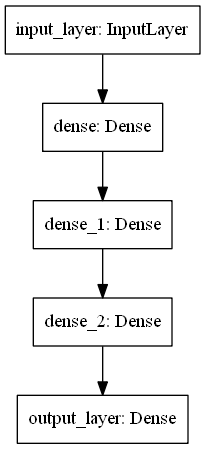

In [68]:
keras.utils.plot_model(model1)

In [69]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7680      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 172,033
Trainable params: 172,033
Non-trainable params: 0
_________________________________________________________________


In [70]:
model1.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy']) 

In [71]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
model1.fit(x_train1, y_train1,
          batch_size=150,
          validation_split=0.1,
          epochs=100,
          verbose=1,
          callbacks=[checkpoint])

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6896 - accuracy: 0.5533
Epoch 00001: val_loss improved from inf to 0.62842, saving model to best_model.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 0.6952 - accuracy: 0.5579 - val_loss: 0.6284 - val_accuracy: 0.7674
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5600
Epoch 00002: val_loss did not improve from 0.62842
3/3 [==============================] - 0s 6ms/step - loss: 0.6779 - accuracy: 0.5947 - val_loss: 0.6354 - val_accuracy: 0.7442
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6753 - accuracy: 0.5800
Epoch 00003: val_loss improved from 0.62842 to 0.60077, saving model to best_model.hdf5
3/3 [==============================] - 0s 10ms/step - loss: 0.6751 - accuracy: 0.5947 - val_loss: 0.6008 - val_accuracy: 0.7442
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6792 - accuracy: 0.5333
Epoch 00004: val_loss 

In [72]:
model1.evaluate(x_test1, y_test1)

6/6 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.5659


[0.7752530574798584, 0.5659340620040894]

## Decision Trees

In [73]:
X2, y2 = df1.drop(columns = ['Buy_Sell']).values, df1['Buy_Sell'].values

In [74]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 20)

In [75]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [76]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20)
model2.fit(x_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20)

In [77]:
# dot_data = tree.export_graphviz(model2, out_file=None, 
#     feature_names=df1.drop('Buy_Sell', axis=1).columns,  
#     class_names=df1['Buy_Sell'].unique(),  
#     filled=True, rounded=True,  
#     special_characters=True)
# graph = graphviz.Source(dot_data)
# graph

In [78]:
for i, column in enumerate(df1.drop('Buy_Sell', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, model2.feature_importances_[i]))

Importance of feature Employment_Persons:, 0.000
Importance of feature CPI:, 0.000
Importance of feature M1:, 0.000
Importance of feature M3:, 0.000
Importance of feature All_Employees:, 0.000
Importance of feature Industrial_Production_Index:, 0.418
Importance of feature Personal_Consumption_Expenditures:, 0.000
Importance of feature Commercial_and_Industrial_Loans:, 0.000
Importance of feature Real_Disposable_Personal_Income:, 0.000
Importance of feature Currency_in_Circulation:, 0.000
Importance of feature WTI:, 0.263
Importance of feature Population:, 0.000
Importance of feature Personal_Saving:, 0.319
Importance of feature Demand_Deposits:, 0.000


In [100]:
from sklearn.metrics import mean_squared_error

In [106]:
y_pred2 = model2.predict(x_test2)
print('Accuracy_score',accuracy_score(y_test2,y_pred2))
print('Mean_squared_error', mean_squared_error(y_test2, y_pred2))

Accuracy_score 0.5989010989010989
Mean_squared_error 0.4010989010989011


In [80]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

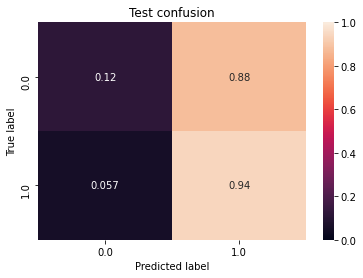

In [81]:
cm = confusion_matrix(y_test2, y_pred2)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=model2.classes_, title='Test confusion')

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
X3, y3 = df1.drop(columns = ['Buy_Sell']).values, df1['Buy_Sell'].values

In [84]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3, random_state = 20)

In [122]:
model3 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 15)
model3.fit(x_train3, y_train3)
y_pred3 = model3.predict(x_test3)
print('Accuracy_score',accuracy_score(y_test3,y_pred3))
print('Mean_squared_error', mean_squared_error(y_test3, y_pred3))

Accuracy_score 0.510989010989011
Mean_squared_error 0.489010989010989


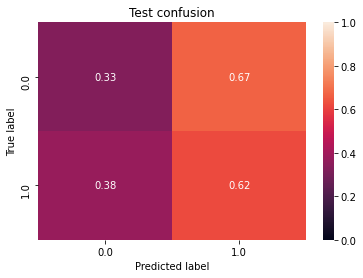

In [112]:
cm = confusion_matrix(y_test3, y_pred3)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=model3.classes_, title='Test confusion')

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
X4, y4 = df1.drop(columns = ['Buy_Sell']).values, df1['Buy_Sell'].values

In [89]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.3, random_state = 20)

In [124]:
model4 = LogisticRegression(solver='lbfgs',random_state=20)
model4.fit(x_train4, y_train4)
y_pred4 = model4.predict(x_test4)
print('Accuracy_score',accuracy_score(y_test4,y_pred4))
print('Mean_squared_error', mean_squared_error(y_test4, y_pred4))

Accuracy_score 0.5769230769230769
Mean_squared_error 0.4230769230769231


## Support Vector machine

In [91]:
from sklearn.svm import LinearSVC, SVC

In [92]:
X5, y5 = df1.drop(columns = ['Buy_Sell']).values, df1['Buy_Sell'].values

In [93]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.3, random_state = 20)

In [125]:
model5 = LinearSVC(random_state=20,max_iter=400)
model5.fit(x_train5, y_train5)
y_pred5 = model5.predict(x_test5)
print('Accuracy_score',accuracy_score(y_test5,y_pred5))
print('Mean_squared_error', mean_squared_error(y_test5, y_pred5))

Accuracy_score 0.5714285714285714
Mean_squared_error 0.42857142857142855


C:\Users\Asosi\anaconda3\envs\deeplearning\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
